# Quantum ML Project - Binary Classification on the Parity problem  | **Experiments notebook**  | Task (b)

Install pennylane

In [1]:
# %pip install pennylane
# %pip install pandas
# %pip install matplotlib

In [2]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer, AdamOptimizer, GradientDescentOptimizer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Data
Data is generated using the parity function. The parity function is a function that returns 1 if the number of 1s in the input is odd, and 0 otherwise. The input is a binary string of length n. The parity function is a well-known example of a function that is not efficiently learnable by a classical neural network. However, it can be learned efficiently by a quantum neural network.

## Read

In [3]:
train_classA = np.loadtxt('./data/classA_train.dat')
train_classB = np.loadtxt('./data/classB_train.dat')
test_classA = np.loadtxt('./data/classA_test.dat')
test_classB = np.loadtxt('./data/classB_test.dat')

train_data = np.vstack((train_classA, train_classB))
train_labels = np.hstack((np.zeros(len(train_classA)), np.ones(len(train_classB))))

## Preprocess

In [4]:
train_classA -= 0.5
train_classB -= 0.5
test_classA -= 0.5
test_classB -= 0.5

Creating train and test datasets

In [5]:
train_data = np.vstack((train_classA, train_classB))
train_labels = np.hstack((np.zeros(len(train_classA)), np.ones(len(train_classB))))

test_data = np.vstack((test_classA, test_classB))
test_labels = np.hstack((np.zeros(len(test_classA)), np.ones(len(test_classB))))

Preview

In [6]:
train_data

tensor([[-0.52136932,  0.51634261,  0.57685187],
        [ 0.47967195,  0.47521001, -0.48276349],
        [ 0.45851495,  0.48880249, -0.47751312],
        [ 0.47287287,  0.50130472, -0.48129676],
        [ 0.4490846 ,  0.49955922, -0.53082429],
        [-0.46906929, -0.51708618, -0.51294948],
        [ 0.40494731,  0.57586463, -0.5228194 ],
        [-0.46868174, -0.51639052, -0.50394778],
        [ 0.45230147,  0.53798005, -0.47490086],
        [ 0.44109225, -0.48876122,  0.49780467],
        [ 0.55928369,  0.53811759, -0.49537057],
        [-0.48554956,  0.5311928 ,  0.53043502],
        [-0.49101668, -0.52985789, -0.49328596],
        [ 0.56489058,  0.52622874, -0.47390937],
        [ 0.50082764, -0.5481794 ,  0.49814355],
        [-0.49541045, -0.46895463, -0.44893712],
        [-0.45864197, -0.47720196, -0.53279515],
        [ 0.56208121, -0.49005089,  0.50610096],
        [-0.57611053,  0.46526223,  0.47765986],
        [ 0.4342591 , -0.49482992,  0.52829108],
        [-0.4194763 

In [7]:
test_data

tensor([[ 0.4879638 ,  0.54024352, -0.46494221],
        [-0.49177858, -0.51371639, -0.47245236],
        [ 0.49295538, -0.4814586 ,  0.48787918],
        [ 0.55597339,  0.5324364 , -0.49658654],
        [-0.52495464, -0.48868671, -0.51545709],
        [-0.45134428, -0.52187662, -0.53744429],
        [-0.51112591,  0.53013485,  0.51654904],
        [ 0.52916993, -0.49962332,  0.51428079],
        [-0.4897708 ,  0.4922424 ,  0.5334223 ],
        [-0.46431262, -0.45484039, -0.50036212],
        [ 0.51488301, -0.53164158, -0.52451988],
        [-0.49771912,  0.52398959, -0.49891081],
        [-0.50994703,  0.45064989, -0.48652751],
        [ 0.41944514, -0.54143044, -0.54457641],
        [ 0.52296955, -0.50002518, -0.52334696],
        [-0.45378063,  0.47989627, -0.47546236],
        [-0.47659954,  0.4897321 , -0.51949139],
        [-0.4566875 ,  0.51162301, -0.47473584],
        [ 0.45832342,  0.51347606,  0.48019078],
        [ 0.46999107, -0.51461362, -0.50094802]], requires_grad=True)

## Visualizing input data

2-dimensional. showing the difficulty of the problem in a 2-dimensional space.

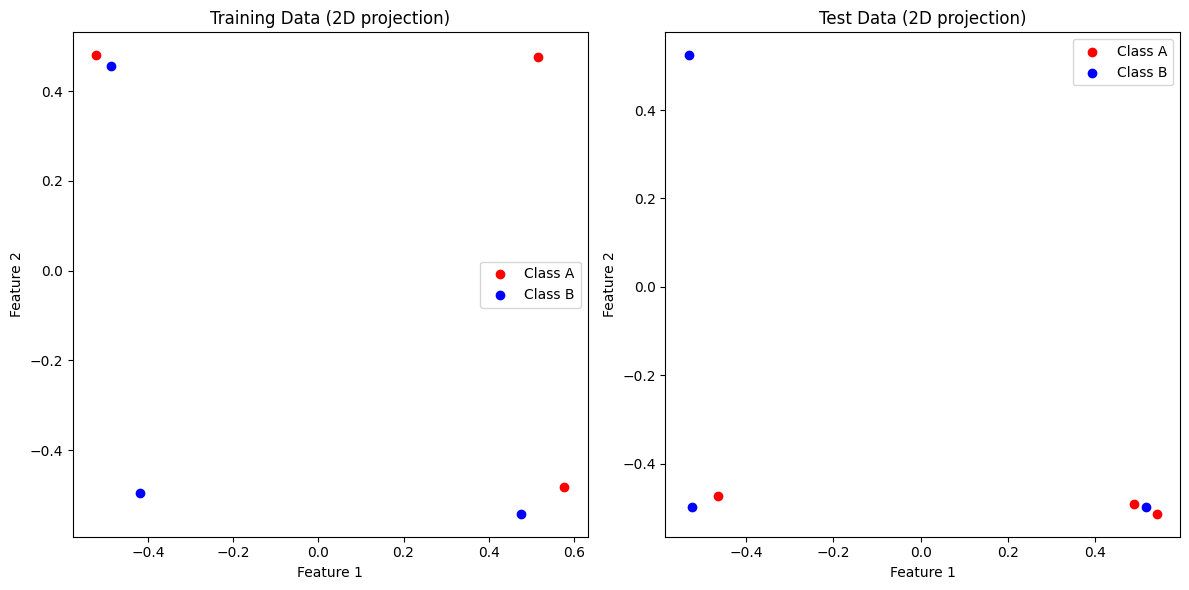

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(train_classA[0], train_classA[1], color='red', label='Class A')
ax1.scatter(train_classB[0], train_classB[1], color='blue', label='Class B')
ax1.set_title('Training Data (2D projection)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend()

ax2.scatter(test_classA[0], test_classA[1], color='red', label='Class A')
ax2.scatter(test_classB[0], test_classB[1], color='blue', label='Class B')
ax2.set_title('Test Data (2D projection)')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()

plt.tight_layout()
plt.show()

3-dimensional. Cubes are now well separated.

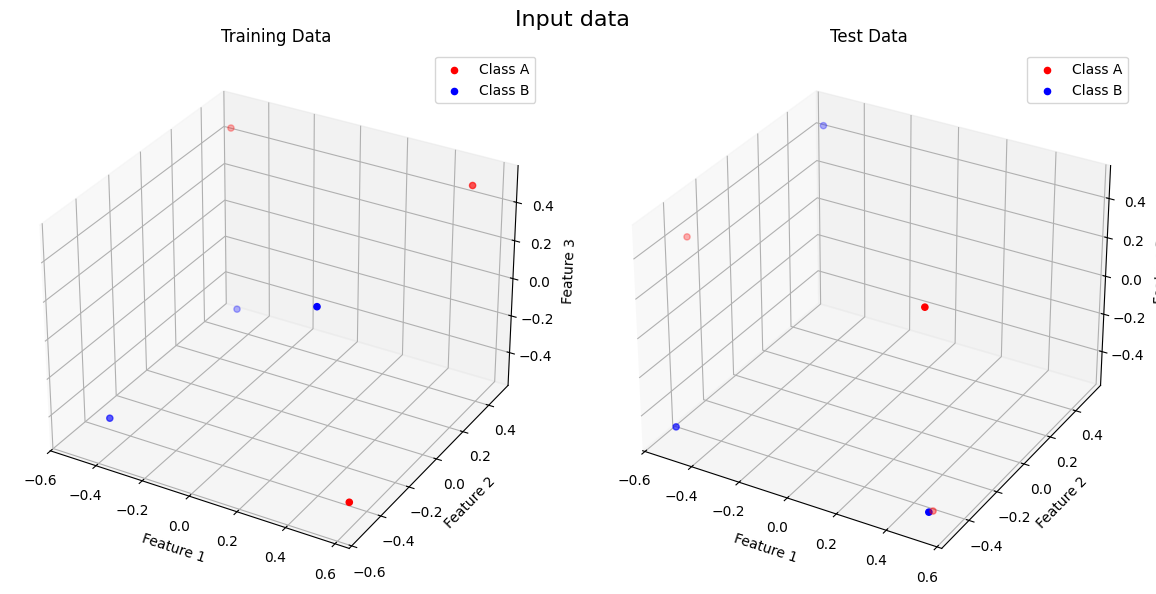

In [9]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(train_classA[0], train_classA[1], train_classA[2], color='red', label='Class A')
ax1.scatter(train_classB[0], train_classB[1], train_classB[2], color='blue', label='Class B')
ax1.set_title('Training Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
ax1.legend()

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(test_classA[0], test_classA[1], test_classA[2], color='red', label='Class A')
ax2.scatter(test_classB[0], test_classB[1], test_classB[2], color='blue', label='Class B')
ax2.set_title('Test Data')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Feature 3')
ax2.legend()

fig.suptitle('Input data', fontsize=16)
plt.tight_layout()
plt.show()

# Quantum Binary Classifiers - Different Circuit Architectures

For building the classifier I will use the pennylane python toolkit.

In [10]:
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2
    loss = loss / len(labels)
    return loss

import matplotlib.pyplot as plt

def plot_metrics(iterations, train_losses, train_accuracies, test_accuracies):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    axs[0].plot(iterations, train_losses, label='Training Loss')
    axs[0].set_xlabel('Iterations')
    axs[0].set_ylabel('Loss')
    axs[0].set_title('Iterations vs Training Loss')
    axs[0].legend()

    axs[1].plot(iterations, train_accuracies, label='Training Accuracy', color='orange')
    axs[1].set_xlabel('Iterations')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_title('Iterations vs Training Accuracy')
    axs[1].legend()

    axs[2].plot(iterations, test_accuracies, label='Test Accuracy', color='green')
    axs[2].set_xlabel('Iterations')
    axs[2].set_ylabel('Accuracy')
    axs[2].set_title('Iterations vs Test Accuracy')
    axs[2].legend()

    plt.tight_layout()
    plt.show()

## AngleEmbedding and BasicEntanglerLayers Circuit

In [11]:
n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits)

def variational_circuit(weights, x):
    qml.templates.AngleEmbedding(x, wires=range(n_qubits))
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))

@qml.qnode(dev)
def circuit(weights, x):
    variational_circuit(weights, x)
    return qml.expval(qml.PauliZ(0))

def variational_classifier(weights, bias, x):
    return circuit(weights, x) + bias

def cost(weights, bias, X, Y):
    predictions = [variational_classifier(weights, bias, x) for x in X]
    return square_loss(Y, predictions)

def train(X, Y, optimizer, weights, bias, epochs=50, batch_size=5):
    np.random.seed(0)
    train_costs = []
    test_accuracies = []
    train_accuracies = []

    for it in range(epochs):
        batch_index = np.random.randint(0, len(X), (batch_size,))
        X_batch = X[batch_index]
        Y_batch = Y[batch_index]
        weights, bias, _, _ = optimizer.step(cost, weights, bias, X_batch, Y_batch)
        
        train_predictions = [variational_classifier(weights, bias, x) for x in X]
        train_acc = np.mean((np.array(train_predictions) > 0.5) == Y)
        
        test_predictions = [variational_classifier(weights, bias, x) for x in test_data]
        test_acc = np.mean((np.array(test_predictions) > 0.5) == test_labels)

        train_costs.append(cost(weights, bias, X, Y))
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
        print(f"Iter: {it+1} | Train Cost: {cost(weights, bias, X, Y):.4f} | Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")
    
    return weights, bias, train_costs, train_accuracies, test_accuracies

def evaluate(weights, bias, X, Y):
    predictions = np.array([variational_classifier(weights, bias, x) for x in X])
    accuracy = np.mean((predictions > 0.5) == Y)
    print(f"Accuracy: {accuracy:.4f}")
    return predictions, accuracy

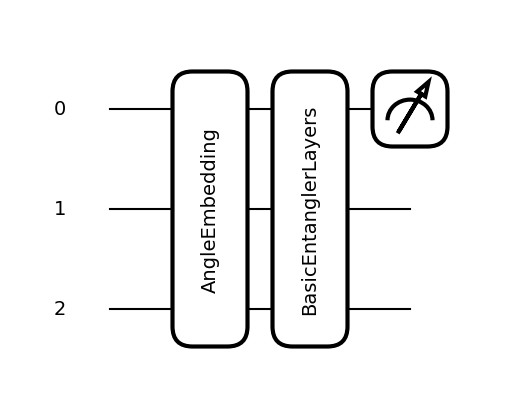

Iter: 1 | Train Cost: 0.3408 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 2 | Train Cost: 0.2811 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 3 | Train Cost: 0.2867 | Train Accuracy: 0.6000 | Test Accuracy: 0.3500
Iter: 4 | Train Cost: 0.7252 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 5 | Train Cost: 0.3184 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 6 | Train Cost: 0.2816 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 7 | Train Cost: 0.3689 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 8 | Train Cost: 0.2567 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 9 | Train Cost: 0.4822 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 10 | Train Cost: 0.5297 | Train Accuracy: 0.4000 | Test Accuracy: 0.6500
Iter: 11 | Train Cost: 0.9402 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 12 | Train Cost: 0.4614 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 13 | Train Cost: 0.3895 | Train Accuracy: 0.5000 | Test

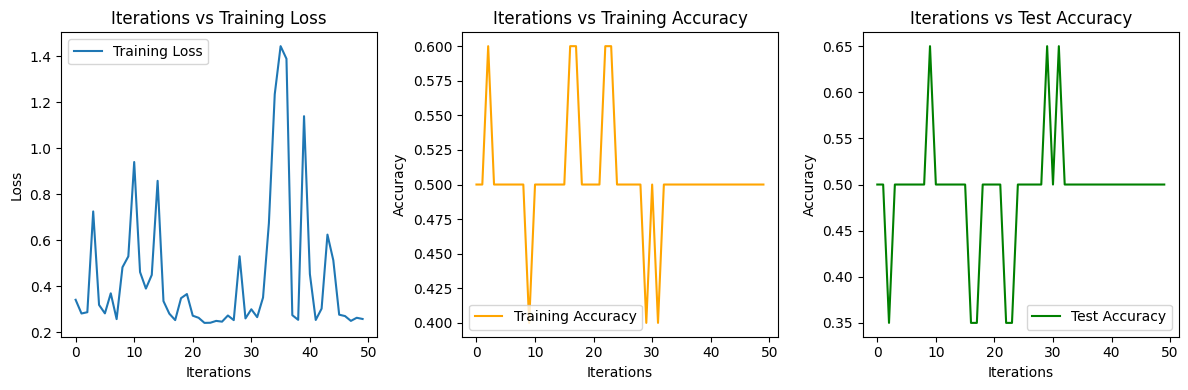

In [12]:
np.random.seed(0)
num_layers = 2
weights_init = 0.01 * np.random.randn(num_layers, n_qubits)
bias_init = np.array(0.0, requires_grad=True)
fig, ax = qml.draw_mpl(circuit)(weights_init, np.zeros(n_qubits))
plt.show()
opt = NesterovMomentumOptimizer(0.5)
X = train_data
Y = train_labels
epochs=30
weights, bias, train_costs, train_accuracies, test_accuracies = train(X, Y, opt, weights_init, bias_init, epochs=epochs)
predictions = [variational_classifier(weights, bias, x) for x in test_data]
plot_metrics(range(0, epochs), train_costs, train_accuracies, test_accuracies)

In [13]:
accuracy = np.mean((np.array(predictions) > 0.5) == test_labels)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.5000


## Ansatz Circuit

In [14]:
n_qubits = train_data.shape[1]
num_layers = 1

dev = qml.device("default.qubit", wires=n_qubits)

def circuit(weights, x):
    for i in range(n_qubits):
        qml.RZ(x[i], wires=i)

    for i in range(n_qubits):
        qml.Hadamard(wires=i)
        qml.RZ(weights[0, i, 0], wires=i)
        qml.RY(weights[0, i, 1], wires=i)
        qml.RZ(weights[0, i, 2], wires=i)

    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i + 1])

    for l in range(1, num_layers):
        for i in range(n_qubits):
            qml.RZ(weights[l, i, 0], wires=i)
            qml.RY(weights[l, i, 1], wires=i)
            qml.RZ(weights[l, i, 2], wires=i)
            if i < n_qubits - 1:
                qml.CNOT(wires=[i, i + 1])

    return qml.expval(qml.PauliZ(0))

qnode = qml.QNode(circuit, dev)

def variational_classifier(weights, bias, x):
    return qnode(weights, x) + bias

def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss += (l - p) ** 2
    loss /= len(labels)
    return loss

def cost(weights, bias, X, Y):
    predictions = [variational_classifier(weights, bias, x) for x in X]
    return square_loss(Y, predictions)

def train(X, Y, num_layers, optimizer, learning_rate=0.1, epochs=50, batch_size=5):
    np.random.seed(0)
    weights_init = 0.01 * np.random.randn(num_layers, n_qubits, 3)
    bias_init = np.array(0.0, requires_grad=True)

    opt = optimizer(learning_rate)
    weights = weights_init
    bias = bias_init
    train_costs = []
    test_accuracies = []
    train_accuracies = []

    for it in range(epochs):
        batch_index = np.random.randint(0, len(X), (batch_size,))
        X_batch = X[batch_index]
        Y_batch = Y[batch_index]
        weights, bias, _, _ = opt.step(cost, weights, bias, X_batch, Y_batch)
        
        train_predictions = [variational_classifier(weights, bias, x) for x in X]
        train_acc = np.mean((np.array(train_predictions) > 0.5) == Y)
        
        test_predictions = [variational_classifier(weights, bias, x) for x in test_data]
        test_acc = np.mean((np.array(test_predictions) > 0.5) == test_labels)
        
        train_costs.append(cost(weights, bias, X, Y))
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
        print(f"Iter: {it+1} | Train Cost: {cost(weights, bias, X, Y):.4f} | Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")
    
    return weights, bias, train_costs, train_accuracies, test_accuracies

def evaluate(weights, bias, X, Y):
    predictions = np.array([variational_classifier(weights, bias, x) for x in X])
    accuracy = np.mean((predictions > 0.5) == Y)
    print(f"Accuracy: {accuracy:.4f}")
    return predictions, accuracy

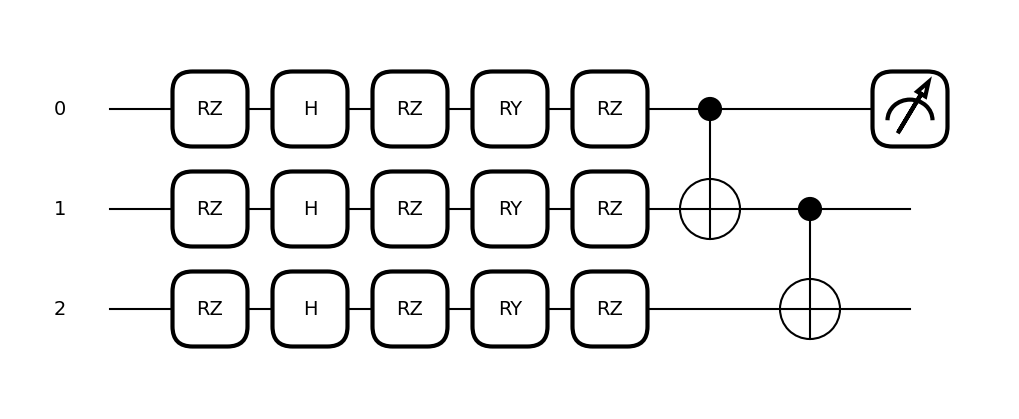

Iter: 1 | Train Cost: 0.3429 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 2 | Train Cost: 0.2691 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 3 | Train Cost: 0.2514 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 4 | Train Cost: 0.2540 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 5 | Train Cost: 0.2658 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 6 | Train Cost: 0.2811 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 7 | Train Cost: 0.2943 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 8 | Train Cost: 0.2923 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 9 | Train Cost: 0.2743 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 10 | Train Cost: 0.2610 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 11 | Train Cost: 0.2517 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 12 | Train Cost: 0.2518 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 13 | Train Cost: 0.2685 | Train Accuracy: 0.5000 | Test

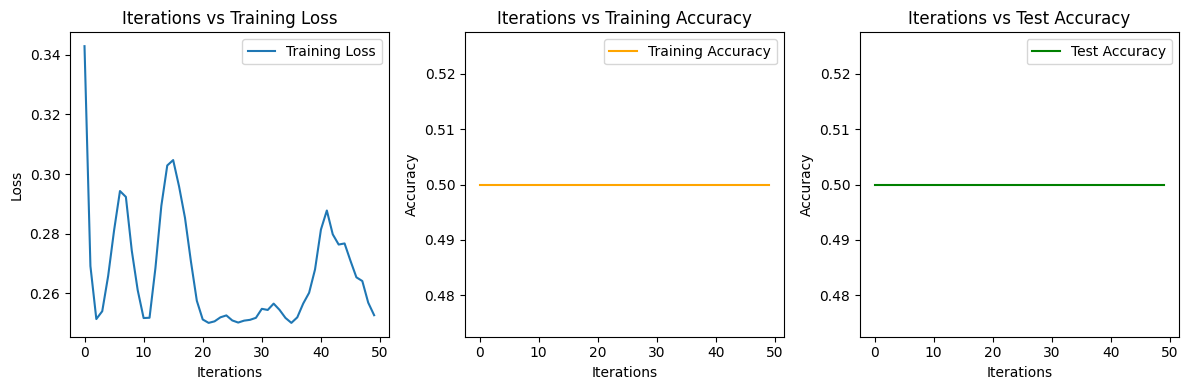

In [15]:
init_params = weights_init = 0.01 * np.random.randn(num_layers, n_qubits, 3)
fig, ax = qml.draw_mpl(circuit)(init_params, np.zeros(n_qubits))
plt.show()
epochs = 50
weights, bias, train_costs, train_accuracies, test_accuracies = train(train_data, train_labels, num_layers, AdamOptimizer, learning_rate=0.1, epochs=epochs, batch_size=5)
predictions, accuracy = evaluate(weights, bias, test_data, test_labels)
plot_metrics(range(0, epochs), train_costs, train_accuracies, test_accuracies)

## Data reUploading Circuit

Iter: 1 | Train Cost: 0.4194 | Train Accuracy: 0.4500 | Test Accuracy: 0.5500
Iter: 2 | Train Cost: 0.3766 | Train Accuracy: 0.4500 | Test Accuracy: 0.5000
Iter: 3 | Train Cost: 0.3351 | Train Accuracy: 0.4750 | Test Accuracy: 0.5500
Iter: 4 | Train Cost: 0.3307 | Train Accuracy: 0.5500 | Test Accuracy: 0.5500
Iter: 5 | Train Cost: 0.3612 | Train Accuracy: 0.5750 | Test Accuracy: 0.5500
Iter: 6 | Train Cost: 0.2992 | Train Accuracy: 0.5750 | Test Accuracy: 0.5500
Iter: 7 | Train Cost: 0.2492 | Train Accuracy: 0.5750 | Test Accuracy: 0.5500
Iter: 8 | Train Cost: 0.2171 | Train Accuracy: 0.6500 | Test Accuracy: 0.6500
Iter: 9 | Train Cost: 0.1923 | Train Accuracy: 0.8000 | Test Accuracy: 0.9000
Iter: 10 | Train Cost: 0.1779 | Train Accuracy: 0.8000 | Test Accuracy: 0.9000
Iter: 11 | Train Cost: 0.1672 | Train Accuracy: 0.7750 | Test Accuracy: 0.9000
Iter: 12 | Train Cost: 0.1661 | Train Accuracy: 0.7250 | Test Accuracy: 1.0000
Iter: 13 | Train Cost: 0.1780 | Train Accuracy: 0.6250 | Test

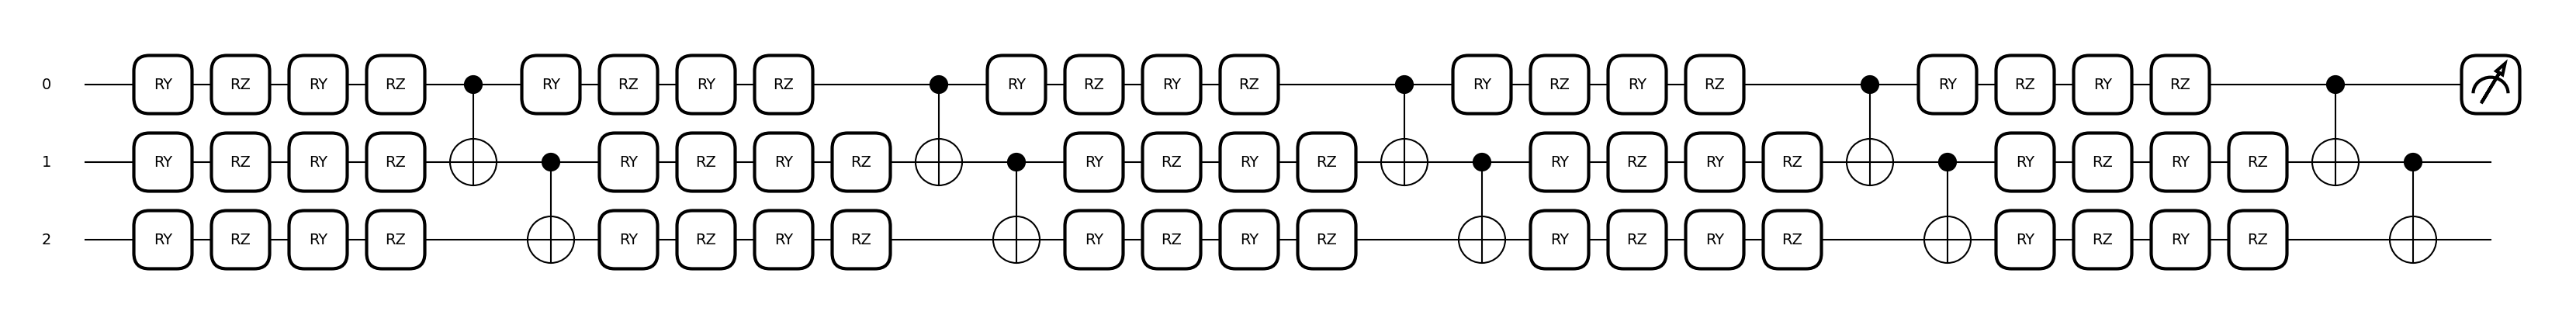

Accuracy: 1.0000


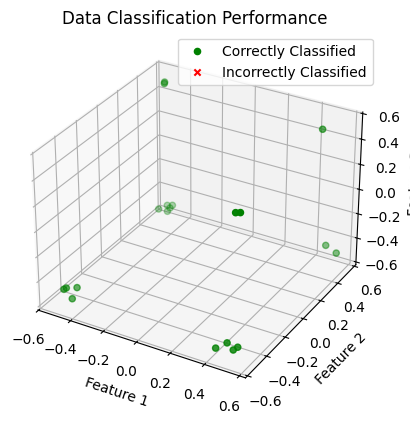

In [18]:
n_qubits = train_data.shape[1]
num_reuploads = 5
dev = qml.device("default.qubit", wires=n_qubits)

def circuit(weights, x):
    for layer in range(num_reuploads):
        for i in range(n_qubits):
            qml.RY(x[i], wires=i)
            qml.RZ(weights[layer, i, 0], wires=i)
            qml.RY(weights[layer, i, 1], wires=i)
            qml.RZ(weights[layer, i, 2], wires=i)
        for i in range(n_qubits - 1):
            qml.CNOT(wires=[i, i + 1])
    return qml.expval(qml.PauliZ(0))

qnode = qml.QNode(circuit, dev)

def variational_classifier(weights, bias, x):
    return qnode(weights, x) + bias

def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss += (l - p) ** 2
    loss /= len(labels)
    return loss

def cost(weights, bias, X, Y):
    predictions = [variational_classifier(weights, bias, x) for x in X]
    return square_loss(Y, predictions)

def train(X, Y, num_reuploads, optimizer, learning_rate=0.1, epochs=50, batch_size=5):
    np.random.seed(0)
    weights_init = 0.01 * np.random.randn(num_reuploads, n_qubits, 3)
    bias_init = np.array(0.0, requires_grad=True)

    opt = optimizer(learning_rate)
    weights = weights_init
    bias = bias_init

    train_costs = []
    test_accuracies = []
    train_accuracies = []

    for it in range(epochs):
        batch_index = np.random.randint(0, len(X), (batch_size,))
        X_batch = X[batch_index]
        Y_batch = Y[batch_index]
        weights, bias, _, _ = opt.step(cost, weights, bias, X_batch, Y_batch)
        
        train_predictions = [variational_classifier(weights, bias, x) for x in X]
        train_acc = np.mean((np.array(train_predictions) > 0.5) == Y)
        
        test_predictions = [variational_classifier(weights, bias, x) for x in test_data]
        test_acc = np.mean((np.array(test_predictions) > 0.5) == test_labels)
        
        train_costs.append(cost(weights, bias, X, Y))
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
        print(f"Iter: {it+1} | Train Cost: {cost(weights, bias, X, Y):.4f} | Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")
    
    return weights, bias, train_costs, train_accuracies, test_accuracies

def evaluate(weights, bias, X, Y):
    predictions = np.array([variational_classifier(weights, bias, x) for x in X])
    accuracy = np.mean((predictions > 0.5) == Y)
    print(f"Accuracy: {accuracy:.4f}")
    return predictions, accuracy

def visualize_performance(X, Y, predictions):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    correctly_classified = (predictions > 0.5) == Y
    incorrectly_classified = ~correctly_classified

    ax.scatter(X[correctly_classified, 0], X[correctly_classified, 1], X[correctly_classified, 2], c='green', marker='o', label='Correctly Classified')
    ax.scatter(X[incorrectly_classified, 0], X[incorrectly_classified, 1], X[incorrectly_classified, 2], c='red', marker='x', label='Incorrectly Classified')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title("Data Classification Performance")
    ax.legend()
    plt.show()



epochs = 50
weights, bias, train_costs, train_accuracies, test_accuracies = train(train_data, train_labels, num_reuploads, AdamOptimizer, learning_rate=0.1, epochs=epochs, batch_size=5)
weights_init = 0.01 * np.random.randn(num_reuploads, n_qubits, 3)
fig, ax = qml.draw_mpl(circuit)(weights_init, np.zeros(n_qubits))
plt.show()

predictions, accuracy = evaluate(weights, bias, test_data, test_labels)

visualize_performance(test_data, test_labels, predictions)


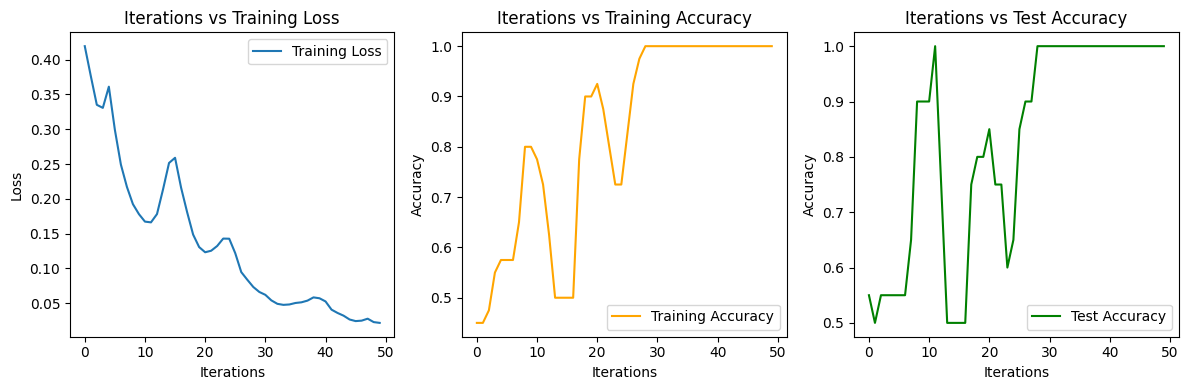

In [ ]:
plot_metrics(range(0, epochs), train_costs, train_accuracies, test_accuracies)